In [114]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
df = pd.read_csv(r"Data/kc_house_data.csv")

train_data = df.sample(100,random_state=0)
input = train_data[['sqft_living']].values
output = train_data['price'].values

In [115]:
def normalize_features(feature_matrix):
    norms = np.linalg.norm(feature_matrix, axis=0)
    normalized_features = feature_matrix / norms
    return (normalized_features, norms)


## 1D KNN (K = 1)

In [116]:
# This code calculates the euclidean distance for the first house wrt to next 9 houses (sample)
input = train_data[['sqft_living']].values
output = train_data['price'].values
norm_input, norms = normalize_features(input)
euc_dist = []
train_input, train_output = norm_input[1:], output[1:]
test_input, test_output = norm_input[0], output[0]
for index, i in enumerate(train_input):
    distance = np.round(np.sqrt((test_input - i)**2), 3)
    euc_dist.append(distance)
    print(index, *distance)

0 0.135
1 0.0
2 0.013
3 0.073
4 0.009
5 0.012
6 0.046
7 0.043
8 0.126
9 0.039
10 0.012
11 0.017
12 0.004
13 0.073
14 0.009
15 0.004
16 0.029
17 0.021
18 0.003
19 0.01
20 0.033
21 0.02
22 0.014
23 0.039
24 0.014
25 0.004
26 0.009
27 0.028
28 0.011
29 0.027
30 0.025
31 0.047
32 0.079
33 0.068
34 0.016
35 0.007
36 0.025
37 0.049
38 0.015
39 0.01
40 0.002
41 0.041
42 0.051
43 0.038
44 0.039
45 0.018
46 0.071
47 0.005
48 0.073
49 0.0
50 0.033
51 0.074
52 0.012
53 0.087
54 0.004
55 0.004
56 0.024
57 0.006
58 0.053
59 0.008
60 0.027
61 0.003
62 0.07
63 0.059
64 0.072
65 0.009
66 0.055
67 0.085
68 0.023
69 0.094
70 0.005
71 0.028
72 0.008
73 0.073
74 0.127
75 0.049
76 0.082
77 0.01
78 0.029
79 0.024
80 0.04
81 0.104
82 0.03
83 0.027
84 0.026
85 0.005
86 0.004
87 0.013
88 0.012
89 0.173
90 0.053
91 0.04
92 0.037
93 0.141
94 0.008
95 0.027
96 0.053
97 0.004
98 0.029


In [117]:
neighbour = np.argmin(euc_dist)
print(f"Actual : {test_output}, prediction : {train_output[neighbour]}")

Actual : 297000.0, prediction : 562100.0


In [118]:
# Validate
print(*input, *output)

[1430.] [4670.] [1440.] [1130.] [3180.] [1650.] [1720.] [2538.] [2460.] [4460.] [2360.] [1720.] [1020.] [1340.] [3180.] [1220.] [1530.] [2130.] [930.] [1370.] [1670.] [2220.] [1900.] [1100.] [2370.] [1100.] [1530.] [1640.] [2110.] [1690.] [2070.] [2020.] [2560.] [3330.] [3070.] [1820.] [1260.] [2040.] [2600.] [1080.] [1180.] [1390.] [2410.] [2650.] [2350.] [2370.] [1870.] [3140.] [1550.] [3170.] [1420.] [2210.] [3200.] [1150.] [3510.] [1330.] [1530.] [2000.] [1280.] [2700.] [1250.] [2070.] [1350.] [3110.] [2840.] [3160.] [1640.] [2740.] [3460.] [1970.] [3672.] [1540.] [2110.] [1630.] [3190.] [4480.] [2610.] [3390.] [1680.] [2130.] [2010.] [2390.] [3910.] [2150.] [2070.] [2060.] [1550.] [1340.] [1750.] [1150.] [5584.] [2690.] [2390.] [2320.] [4810.] [1610.] [2080.] [2710.] [1530.] [2130.] 297000.0 1578000.0 562100.0 631500.0 780000.0 485000.0 340000.0 335606.0 425000.0 490000.0 732000.0 389700.0 450000.0 357000.0 960000.0 257000.0 448000.0 610000.0 230950.0 377500.0 375000.0 410000.0 45

## Multi Dimension KNN (K = 1)


In [119]:
# This code calculates the euclidean distance for the first house wrt to next 9 houses (sample)
input = train_data[['sqft_living', 'bedrooms']].values
output = train_data['price'].values
norm_input, norms = normalize_features(input)
euc_dist = []
train_input, train_output = norm_input[1:], output[1:]
test_input, test_output = norm_input[0], output[0]
for index, i in enumerate(train_input):
    distance = np.round(np.sqrt((np.sum(test_input - i))**2), 3) # Just sum the differences in each feature row-wise
    euc_dist.append(distance)
    print(index, distance)

0 0.192
1 0.0
2 0.013
3 0.13
4 0.038
5 0.04
6 0.075
7 0.1
8 0.212
9 0.096
10 0.04
11 0.017
12 0.025
13 0.13
14 0.009
15 0.033
16 0.086
17 0.021
18 0.026
19 0.038
20 0.09
21 0.076
22 0.015
23 0.096
24 0.015
25 0.061
26 0.066
27 0.028
28 0.039
29 0.027
30 0.081
31 0.104
32 0.136
33 0.125
34 0.045
35 0.021
36 0.082
37 0.077
38 0.014
39 0.018
40 0.03
41 0.098
42 0.108
43 0.095
44 0.096
45 0.075
46 0.128
47 0.033
48 0.129
49 0.028
50 0.061
51 0.159
52 0.017
53 0.144
54 0.024
55 0.033
56 0.109
57 0.022
58 0.081
59 0.021
60 0.083
61 0.003
62 0.099
63 0.144
64 0.129
65 0.037
66 0.111
67 0.142
68 0.108
69 0.179
70 0.061
71 0.085
72 0.037
73 0.13
74 0.184
75 0.078
76 0.167
77 0.039
78 0.086
79 0.053
80 0.068
81 0.16
82 0.058
83 0.083
84 0.055
85 0.033
86 0.025
87 0.07
88 0.017
89 0.23
90 0.081
91 0.068
92 0.094
93 0.198
94 0.008
95 0.056
96 0.11
97 0.033
98 0.086


In [120]:
neighbour = np.argmin(euc_dist)
print(f"Actual : {test_output}, prediction : {train_output[neighbour]}")

Actual : 297000.0, prediction : 562100.0


## Multi-Dimension KNN (K > 1)

In [122]:
# This code calculates the euclidean distance for the first house wrt to next 9 houses (sample)
input = train_data[['sqft_living', 'bedrooms']].values
output = train_data['price'].values
norm_input, norms = normalize_features(input)
euc_dist = []
train_input, train_output = norm_input[1:], output[1:]
test_input, test_output = norm_input[0], output[0]
for index, i in enumerate(train_input):
    distance = np.round(np.sqrt((np.sum(test_input - i))**2), 3) # Just sum the differences in each feature row-wise
    euc_dist.append(distance)
    print(index, distance)

0 0.192
1 0.0
2 0.013
3 0.13
4 0.038
5 0.04
6 0.075
7 0.1
8 0.212
9 0.096
10 0.04
11 0.017
12 0.025
13 0.13
14 0.009
15 0.033
16 0.086
17 0.021
18 0.026
19 0.038
20 0.09
21 0.076
22 0.015
23 0.096
24 0.015
25 0.061
26 0.066
27 0.028
28 0.039
29 0.027
30 0.081
31 0.104
32 0.136
33 0.125
34 0.045
35 0.021
36 0.082
37 0.077
38 0.014
39 0.018
40 0.03
41 0.098
42 0.108
43 0.095
44 0.096
45 0.075
46 0.128
47 0.033
48 0.129
49 0.028
50 0.061
51 0.159
52 0.017
53 0.144
54 0.024
55 0.033
56 0.109
57 0.022
58 0.081
59 0.021
60 0.083
61 0.003
62 0.099
63 0.144
64 0.129
65 0.037
66 0.111
67 0.142
68 0.108
69 0.179
70 0.061
71 0.085
72 0.037
73 0.13
74 0.184
75 0.078
76 0.167
77 0.039
78 0.086
79 0.053
80 0.068
81 0.16
82 0.058
83 0.083
84 0.055
85 0.033
86 0.025
87 0.07
88 0.017
89 0.23
90 0.081
91 0.068
92 0.094
93 0.198
94 0.008
95 0.056
96 0.11
97 0.033
98 0.086


In [123]:
def get_knn_result(euc_dist, train_output, k):
    ind = np.argsort(euc_dist)[:k]
    pred = np.mean([train_output[i] for i in ind])
    return pred

In [124]:
prediction_all = []
test_error_all = []
for k in range(10):
    k += 1
    prediction = get_knn_result(euc_dist, train_output, k)
    test_error = np.sqrt((prediction - test_output)**2)
    prediction_all.append(prediction)
    test_error_all.append(test_error)

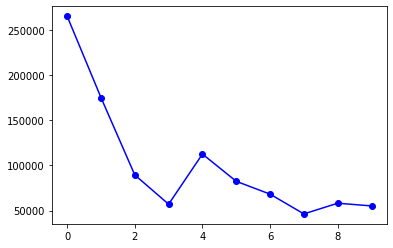

In [128]:
plt.plot(np.arange(10), test_error_all, 'bo-')

## Notes:       
1. Changing the number of training data, affects the testing equvialently. As more nearest nieghbours to find from.             
2. Difference between 1-D and N-D data is about summing the differences in features before taking square root for euclidean distance.       
3. As you increase the K in KNN, errors reduce and it will be generalize more. But again it can underfit or it can be biased to larger class. Hence, look at elbow curve and choose the minimum value which had low error.          